In [1]:
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import numpy as np
from matplotlib.colors import ListedColormap
get_ipython().run_line_magic('matplotlib', 'inline')

In [6]:
def PotentiaFunctions(X, y, K, h, t, u):
    P = []
    for i in range(0, len(X)):
        P.append(t[y[i]]*K( ((X[i][0] - u[0])**2 + (X[i][1] - u[1])**2) / h[i], 1))
    return np.argmax(np.bincount(y, P))


def GetHForPotentialFunctions(X, y, p):
    diff = 1
    u = [[], 0]
    t = []
    for i in range(0,len(np.unique(y))):
        t.append(0);
    h = [0.45 for x in X]
    stopsignal = 100
    while(diff>p and stopsignal>=0):
        cd = 0
        for i in range(1, len(X)):
            u[0] = X[i]
            u[1] = y[i]
            Xt = np.delete(X, i, 0)
            yt = np.delete(y, i)
            ht = np.delete(h, i)
            if (PotentiaFunctions(Xt, yt, K, ht,t, u[0]) != u[1]):
                cd = cd + 1
                t[u[1]] = t[u[1]]+1
        diff = cd/len(X)
        print(str(diff*100)+"% :"+str(cd)+" errs of "+str(len(X)))
        stopsignal = stopsignal - 1
    return h,t

def K(x,l):
    if(x>l):
        return 0;
    else:
        return (l-x)/l;

In [7]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

hs,t = GetHForPotentialFunctions(X,y,0.02)

3.3333333333333335% :5 errs of 150
14.000000000000002% :21 errs of 150
20.0% :30 errs of 150
21.333333333333336% :32 errs of 150
20.666666666666668% :31 errs of 150
21.333333333333336% :32 errs of 150
22.0% :33 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
20.666666666666668% :31 errs of 150
22.0% :33 errs of 150
22.0% :33 errs of 150
21.333333333333336% :32 errs of 150
22.0% :33 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
22.0% :33 errs of 150
21.333333333333336% :32 errs of 150
22.0% :33 errs of 150
21.333333333333336% :32 errs of 150
21.333333333333336% :32 errs of 150
22.0% :33 errs of 1

In [8]:
h = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = np.array([PotentiaFunctions(X, y, K, hs, t, u) for u in  np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

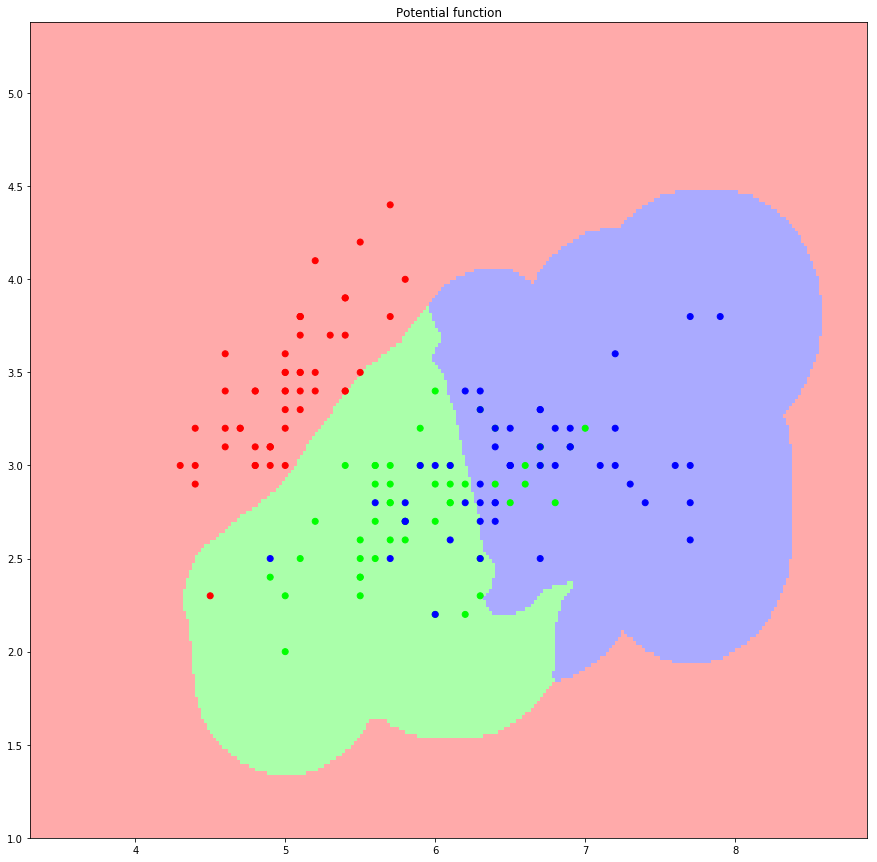

In [9]:
plt.figure(figsize=(15,15))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:,0],X[:,1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Potential function")
plt.show()